# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

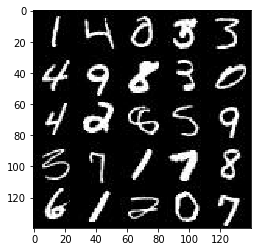

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

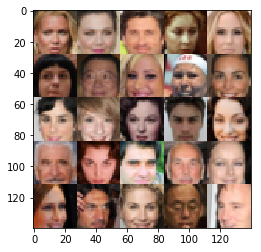

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        # conv1
        x1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)
        
        # conv2
        x2 = tf.layers.conv2d(x1, 128, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.nn.relu(x2)
        
        # conv3
        x3 = tf.layers.conv2d(x2, 256, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.nn.relu(x3)
        
        # flatten
        flat = tf.reshape(x3, (-1, 4 * 4 * 256))
        
        # out
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # fc
        x1 = tf.layers.dense(z, 7 * 7 * 512)

        #  reshape
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.relu(x1)

        # conv1
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)

        # conv2
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.relu(x3)

        # out
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode)
    # 2 None None None None <bound method Dataset.get_batches...> (60000, 28, 28, 1) L
    
    steps = 0
    # def model_inputs(image_width, image_height, image_channels, z_dim):
    inputs_real, inputs_z, inputs_learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], 
                                                               z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2
                
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, 
                                               inputs_learning_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, 
                                               inputs_learning_rate: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = sess.run(d_loss, feed_dict={inputs_real: batch_images, inputs_z: batch_z})
                    train_loss_g = sess.run(g_loss, feed_dict={inputs_z: batch_z})
                    
                    print("Epoch {}/{}".format(epoch_i + 1, epoch_count),
                         "Discriminator Loss: {:.4f}".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    # def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
                    show_generator_output(sess, 10, inputs_z, data_shape[3], data_image_mode)
                    
                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

2 32 100 0.002 0.5 <bound method Dataset.get_batches of <helper.Dataset object at 0x7fb2a6e21e10>> (60000, 28, 28, 1) L
Epoch 1/2 Discriminator Loss: 0.4608 Generator Loss: 7.3340
Epoch 1/2 Discriminator Loss: 0.5836 Generator Loss: 7.5567
Epoch 1/2 Discriminator Loss: 0.3438 Generator Loss: 9.3009
Epoch 1/2 Discriminator Loss: 0.3394 Generator Loss: 6.6490
Epoch 1/2 Discriminator Loss: 0.3427 Generator Loss: 6.2616
Epoch 1/2 Discriminator Loss: 0.3362 Generator Loss: 5.3028
Epoch 1/2 Discriminator Loss: 3.2353 Generator Loss: 0.1745
Epoch 1/2 Discriminator Loss: 1.4517 Generator Loss: 0.5299
Epoch 1/2 Discriminator Loss: 1.5075 Generator Loss: 1.8968
Epoch 1/2 Discriminator Loss: 1.1116 Generator Loss: 1.0449


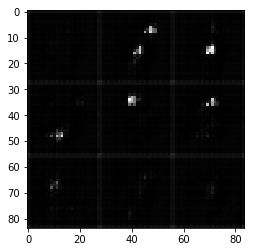

Epoch 1/2 Discriminator Loss: 1.2827 Generator Loss: 0.7344
Epoch 1/2 Discriminator Loss: 1.4116 Generator Loss: 2.1586
Epoch 1/2 Discriminator Loss: 1.6119 Generator Loss: 2.2678
Epoch 1/2 Discriminator Loss: 1.2989 Generator Loss: 0.8055
Epoch 1/2 Discriminator Loss: 1.4171 Generator Loss: 1.6298
Epoch 1/2 Discriminator Loss: 1.1590 Generator Loss: 0.6892
Epoch 1/2 Discriminator Loss: 1.4064 Generator Loss: 2.0663
Epoch 1/2 Discriminator Loss: 1.3853 Generator Loss: 0.5861
Epoch 1/2 Discriminator Loss: 1.1456 Generator Loss: 1.2551
Epoch 1/2 Discriminator Loss: 0.9453 Generator Loss: 1.7049


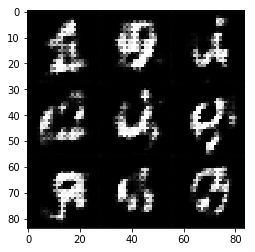

Epoch 1/2 Discriminator Loss: 1.1867 Generator Loss: 0.8533
Epoch 1/2 Discriminator Loss: 1.2427 Generator Loss: 0.7272
Epoch 1/2 Discriminator Loss: 1.3979 Generator Loss: 0.6994
Epoch 1/2 Discriminator Loss: 1.4473 Generator Loss: 0.5058
Epoch 1/2 Discriminator Loss: 1.3776 Generator Loss: 0.5820
Epoch 1/2 Discriminator Loss: 1.3959 Generator Loss: 1.8109
Epoch 1/2 Discriminator Loss: 1.0815 Generator Loss: 1.1931
Epoch 1/2 Discriminator Loss: 1.2715 Generator Loss: 0.7802
Epoch 1/2 Discriminator Loss: 2.1551 Generator Loss: 0.2449
Epoch 1/2 Discriminator Loss: 1.3469 Generator Loss: 0.6457


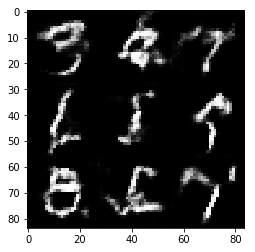

Epoch 1/2 Discriminator Loss: 1.3282 Generator Loss: 1.0370
Epoch 1/2 Discriminator Loss: 1.5385 Generator Loss: 0.5773
Epoch 1/2 Discriminator Loss: 1.1970 Generator Loss: 0.9001
Epoch 1/2 Discriminator Loss: 1.2669 Generator Loss: 0.6633
Epoch 1/2 Discriminator Loss: 1.1818 Generator Loss: 1.2908
Epoch 1/2 Discriminator Loss: 1.7132 Generator Loss: 0.3586
Epoch 1/2 Discriminator Loss: 1.3468 Generator Loss: 0.5712
Epoch 1/2 Discriminator Loss: 1.5482 Generator Loss: 0.4406
Epoch 1/2 Discriminator Loss: 0.9217 Generator Loss: 1.0301
Epoch 1/2 Discriminator Loss: 1.0961 Generator Loss: 1.5157


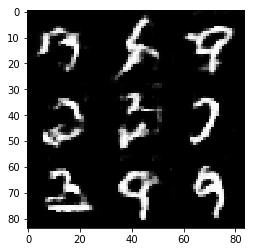

Epoch 1/2 Discriminator Loss: 1.4855 Generator Loss: 0.5169
Epoch 1/2 Discriminator Loss: 1.4280 Generator Loss: 2.1170
Epoch 1/2 Discriminator Loss: 1.2441 Generator Loss: 0.6340
Epoch 1/2 Discriminator Loss: 1.5254 Generator Loss: 0.4663
Epoch 1/2 Discriminator Loss: 1.2685 Generator Loss: 1.2803
Epoch 1/2 Discriminator Loss: 1.3652 Generator Loss: 0.7397
Epoch 1/2 Discriminator Loss: 1.5940 Generator Loss: 0.4178
Epoch 1/2 Discriminator Loss: 1.2177 Generator Loss: 0.6761
Epoch 1/2 Discriminator Loss: 1.2262 Generator Loss: 0.8865
Epoch 1/2 Discriminator Loss: 1.4441 Generator Loss: 0.5653


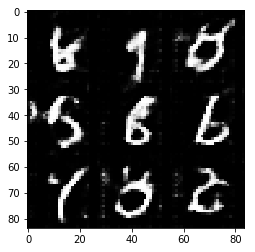

Epoch 1/2 Discriminator Loss: 1.4377 Generator Loss: 0.4825
Epoch 1/2 Discriminator Loss: 1.2102 Generator Loss: 1.0436
Epoch 1/2 Discriminator Loss: 1.3069 Generator Loss: 0.5930
Epoch 1/2 Discriminator Loss: 1.0511 Generator Loss: 1.9470
Epoch 1/2 Discriminator Loss: 1.7115 Generator Loss: 0.3722
Epoch 1/2 Discriminator Loss: 1.5935 Generator Loss: 0.3839
Epoch 1/2 Discriminator Loss: 1.4036 Generator Loss: 0.5271
Epoch 1/2 Discriminator Loss: 1.1254 Generator Loss: 0.7446
Epoch 1/2 Discriminator Loss: 1.4924 Generator Loss: 0.4946
Epoch 1/2 Discriminator Loss: 1.6750 Generator Loss: 0.3923


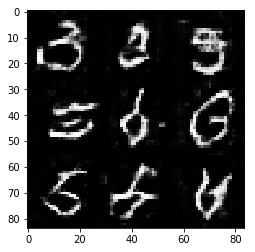

Epoch 1/2 Discriminator Loss: 0.9896 Generator Loss: 1.1000
Epoch 1/2 Discriminator Loss: 1.3933 Generator Loss: 0.5343
Epoch 1/2 Discriminator Loss: 1.0349 Generator Loss: 0.9224
Epoch 1/2 Discriminator Loss: 1.5272 Generator Loss: 0.4349
Epoch 1/2 Discriminator Loss: 1.1445 Generator Loss: 0.7706
Epoch 1/2 Discriminator Loss: 1.0427 Generator Loss: 1.1998
Epoch 1/2 Discriminator Loss: 1.1388 Generator Loss: 1.3042
Epoch 1/2 Discriminator Loss: 1.7222 Generator Loss: 0.3414
Epoch 1/2 Discriminator Loss: 1.5694 Generator Loss: 0.4141
Epoch 1/2 Discriminator Loss: 1.3321 Generator Loss: 0.6322


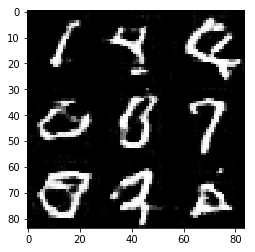

Epoch 1/2 Discriminator Loss: 1.3338 Generator Loss: 1.9180
Epoch 1/2 Discriminator Loss: 1.1108 Generator Loss: 0.7430
Epoch 1/2 Discriminator Loss: 1.5831 Generator Loss: 0.4869
Epoch 1/2 Discriminator Loss: 1.2817 Generator Loss: 0.6869
Epoch 1/2 Discriminator Loss: 0.8964 Generator Loss: 2.3258
Epoch 1/2 Discriminator Loss: 0.7723 Generator Loss: 2.4360
Epoch 1/2 Discriminator Loss: 0.8484 Generator Loss: 1.3101
Epoch 1/2 Discriminator Loss: 1.0857 Generator Loss: 0.8727
Epoch 1/2 Discriminator Loss: 2.1013 Generator Loss: 0.2473
Epoch 1/2 Discriminator Loss: 0.9009 Generator Loss: 1.2667


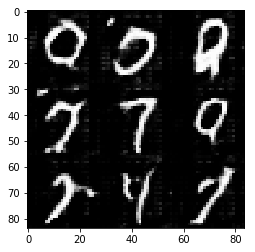

Epoch 1/2 Discriminator Loss: 2.3663 Generator Loss: 0.2023
Epoch 1/2 Discriminator Loss: 1.3049 Generator Loss: 0.6358
Epoch 1/2 Discriminator Loss: 1.2069 Generator Loss: 0.7189
Epoch 1/2 Discriminator Loss: 1.8764 Generator Loss: 0.2787
Epoch 1/2 Discriminator Loss: 1.1454 Generator Loss: 2.0367
Epoch 1/2 Discriminator Loss: 1.4012 Generator Loss: 0.5756
Epoch 1/2 Discriminator Loss: 0.8510 Generator Loss: 1.3104
Epoch 1/2 Discriminator Loss: 0.9039 Generator Loss: 1.3615
Epoch 1/2 Discriminator Loss: 1.3985 Generator Loss: 0.5270
Epoch 1/2 Discriminator Loss: 2.1756 Generator Loss: 0.2624


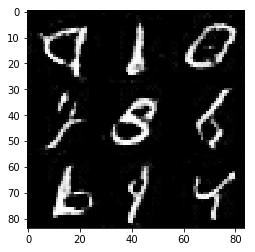

Epoch 1/2 Discriminator Loss: 1.0523 Generator Loss: 0.9655
Epoch 1/2 Discriminator Loss: 1.6627 Generator Loss: 0.4259
Epoch 1/2 Discriminator Loss: 1.4282 Generator Loss: 0.5287
Epoch 1/2 Discriminator Loss: 0.8906 Generator Loss: 1.3076
Epoch 1/2 Discriminator Loss: 0.9174 Generator Loss: 1.0330
Epoch 1/2 Discriminator Loss: 0.7273 Generator Loss: 1.6986
Epoch 1/2 Discriminator Loss: 2.0793 Generator Loss: 0.3352
Epoch 1/2 Discriminator Loss: 1.0297 Generator Loss: 0.9615
Epoch 1/2 Discriminator Loss: 1.4768 Generator Loss: 0.5023
Epoch 1/2 Discriminator Loss: 1.4498 Generator Loss: 0.5601


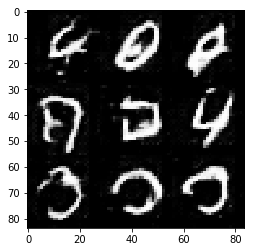

Epoch 1/2 Discriminator Loss: 0.8466 Generator Loss: 1.4433
Epoch 1/2 Discriminator Loss: 0.7628 Generator Loss: 2.2043
Epoch 1/2 Discriminator Loss: 1.0567 Generator Loss: 0.8553
Epoch 1/2 Discriminator Loss: 1.0314 Generator Loss: 0.9344
Epoch 1/2 Discriminator Loss: 0.8360 Generator Loss: 1.2814
Epoch 1/2 Discriminator Loss: 1.3172 Generator Loss: 0.5776
Epoch 1/2 Discriminator Loss: 2.3739 Generator Loss: 0.1998
Epoch 1/2 Discriminator Loss: 0.9479 Generator Loss: 1.1797
Epoch 1/2 Discriminator Loss: 0.9012 Generator Loss: 1.1947
Epoch 1/2 Discriminator Loss: 1.0046 Generator Loss: 0.9719


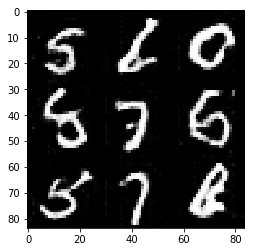

Epoch 1/2 Discriminator Loss: 1.2324 Generator Loss: 0.7178
Epoch 1/2 Discriminator Loss: 0.8529 Generator Loss: 1.2690
Epoch 1/2 Discriminator Loss: 1.4828 Generator Loss: 0.4962
Epoch 1/2 Discriminator Loss: 1.2095 Generator Loss: 0.6802
Epoch 1/2 Discriminator Loss: 1.1263 Generator Loss: 0.7607
Epoch 1/2 Discriminator Loss: 2.3687 Generator Loss: 0.2032
Epoch 1/2 Discriminator Loss: 1.1270 Generator Loss: 1.0008
Epoch 1/2 Discriminator Loss: 1.1370 Generator Loss: 1.0620
Epoch 1/2 Discriminator Loss: 0.9750 Generator Loss: 1.6513
Epoch 1/2 Discriminator Loss: 0.7588 Generator Loss: 1.2219


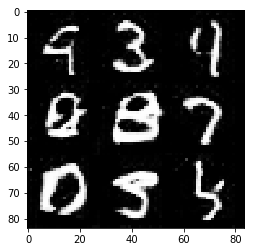

Epoch 1/2 Discriminator Loss: 1.6080 Generator Loss: 0.4679
Epoch 1/2 Discriminator Loss: 0.9797 Generator Loss: 0.9518
Epoch 1/2 Discriminator Loss: 0.8425 Generator Loss: 1.1805
Epoch 1/2 Discriminator Loss: 1.8829 Generator Loss: 0.3235
Epoch 1/2 Discriminator Loss: 1.2117 Generator Loss: 0.7443
Epoch 1/2 Discriminator Loss: 0.7796 Generator Loss: 1.2820
Epoch 1/2 Discriminator Loss: 0.8227 Generator Loss: 1.4453
Epoch 1/2 Discriminator Loss: 1.0956 Generator Loss: 0.9196
Epoch 1/2 Discriminator Loss: 1.0418 Generator Loss: 0.8703
Epoch 1/2 Discriminator Loss: 1.1831 Generator Loss: 0.7627


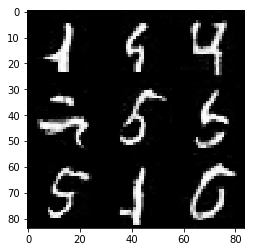

Epoch 1/2 Discriminator Loss: 1.2025 Generator Loss: 0.6589
Epoch 1/2 Discriminator Loss: 0.8875 Generator Loss: 1.1824
Epoch 1/2 Discriminator Loss: 0.7212 Generator Loss: 1.9739
Epoch 1/2 Discriminator Loss: 1.7100 Generator Loss: 0.4459
Epoch 1/2 Discriminator Loss: 0.9408 Generator Loss: 1.1096
Epoch 1/2 Discriminator Loss: 0.8320 Generator Loss: 1.2943
Epoch 1/2 Discriminator Loss: 1.2126 Generator Loss: 0.7321
Epoch 1/2 Discriminator Loss: 1.3455 Generator Loss: 0.6564
Epoch 1/2 Discriminator Loss: 1.3729 Generator Loss: 0.6533
Epoch 1/2 Discriminator Loss: 0.6108 Generator Loss: 1.9107


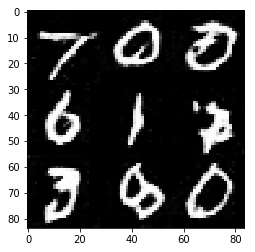

Epoch 1/2 Discriminator Loss: 0.9966 Generator Loss: 0.9342
Epoch 1/2 Discriminator Loss: 0.7380 Generator Loss: 1.4038
Epoch 1/2 Discriminator Loss: 1.0175 Generator Loss: 1.4405
Epoch 1/2 Discriminator Loss: 1.5734 Generator Loss: 0.5259
Epoch 1/2 Discriminator Loss: 1.1794 Generator Loss: 0.8170
Epoch 1/2 Discriminator Loss: 0.8054 Generator Loss: 2.2817
Epoch 1/2 Discriminator Loss: 1.0360 Generator Loss: 0.9479
Epoch 1/2 Discriminator Loss: 0.9988 Generator Loss: 1.4996
Epoch 1/2 Discriminator Loss: 0.7034 Generator Loss: 1.5282
Epoch 1/2 Discriminator Loss: 0.7660 Generator Loss: 1.5885


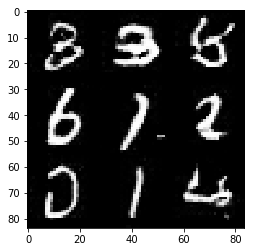

Epoch 1/2 Discriminator Loss: 0.9530 Generator Loss: 1.1532
Epoch 1/2 Discriminator Loss: 1.2144 Generator Loss: 0.7121
Epoch 1/2 Discriminator Loss: 0.9996 Generator Loss: 0.8622
Epoch 1/2 Discriminator Loss: 0.9773 Generator Loss: 1.4677
Epoch 1/2 Discriminator Loss: 0.7249 Generator Loss: 1.7416
Epoch 1/2 Discriminator Loss: 1.4448 Generator Loss: 0.5550
Epoch 1/2 Discriminator Loss: 1.3071 Generator Loss: 0.6922
Epoch 1/2 Discriminator Loss: 1.7149 Generator Loss: 0.5519
Epoch 1/2 Discriminator Loss: 1.0652 Generator Loss: 0.8020
Epoch 1/2 Discriminator Loss: 0.9543 Generator Loss: 1.0894


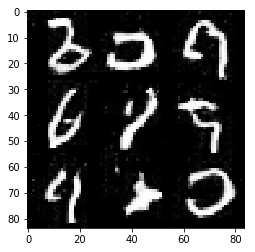

Epoch 1/2 Discriminator Loss: 1.3089 Generator Loss: 0.5902
Epoch 1/2 Discriminator Loss: 0.6696 Generator Loss: 2.0990
Epoch 1/2 Discriminator Loss: 1.1712 Generator Loss: 2.7733
Epoch 1/2 Discriminator Loss: 0.8546 Generator Loss: 1.2247
Epoch 1/2 Discriminator Loss: 0.6670 Generator Loss: 1.5861
Epoch 1/2 Discriminator Loss: 1.0740 Generator Loss: 0.8845
Epoch 1/2 Discriminator Loss: 1.1179 Generator Loss: 0.9314
Epoch 1/2 Discriminator Loss: 0.5392 Generator Loss: 2.3526
Epoch 1/2 Discriminator Loss: 1.4912 Generator Loss: 0.4994
Epoch 1/2 Discriminator Loss: 0.8372 Generator Loss: 1.3659


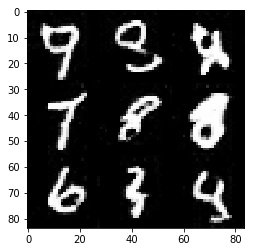

Epoch 1/2 Discriminator Loss: 0.7609 Generator Loss: 1.3168
Epoch 1/2 Discriminator Loss: 1.1416 Generator Loss: 0.8613
Epoch 1/2 Discriminator Loss: 0.9341 Generator Loss: 1.0313
Epoch 1/2 Discriminator Loss: 1.5852 Generator Loss: 0.4619
Epoch 1/2 Discriminator Loss: 1.1772 Generator Loss: 0.6992
Epoch 1/2 Discriminator Loss: 1.1413 Generator Loss: 0.8290
Epoch 1/2 Discriminator Loss: 0.6407 Generator Loss: 1.7344
Epoch 1/2 Discriminator Loss: 0.7595 Generator Loss: 1.4785
Epoch 1/2 Discriminator Loss: 0.9827 Generator Loss: 0.9104
Epoch 1/2 Discriminator Loss: 2.1103 Generator Loss: 0.3334


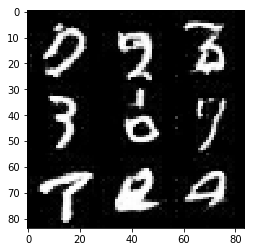

Epoch 1/2 Discriminator Loss: 0.6895 Generator Loss: 1.7655
Epoch 1/2 Discriminator Loss: 0.6116 Generator Loss: 1.8774
Epoch 1/2 Discriminator Loss: 1.1552 Generator Loss: 0.8053
Epoch 1/2 Discriminator Loss: 1.4540 Generator Loss: 0.5365
Epoch 1/2 Discriminator Loss: 0.9757 Generator Loss: 0.8659
Epoch 1/2 Discriminator Loss: 0.6403 Generator Loss: 1.6125
Epoch 1/2 Discriminator Loss: 0.7731 Generator Loss: 1.7973
Epoch 2/2 Discriminator Loss: 0.8912 Generator Loss: 1.1738
Epoch 2/2 Discriminator Loss: 0.8795 Generator Loss: 1.2655
Epoch 2/2 Discriminator Loss: 1.2841 Generator Loss: 2.9271


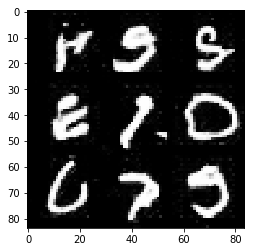

Epoch 2/2 Discriminator Loss: 1.5388 Generator Loss: 0.5989
Epoch 2/2 Discriminator Loss: 0.9966 Generator Loss: 1.0962
Epoch 2/2 Discriminator Loss: 0.9047 Generator Loss: 1.3785
Epoch 2/2 Discriminator Loss: 0.8948 Generator Loss: 2.1496
Epoch 2/2 Discriminator Loss: 1.0978 Generator Loss: 0.7658
Epoch 2/2 Discriminator Loss: 1.3550 Generator Loss: 0.6897
Epoch 2/2 Discriminator Loss: 1.4232 Generator Loss: 0.5172
Epoch 2/2 Discriminator Loss: 0.7472 Generator Loss: 1.8029
Epoch 2/2 Discriminator Loss: 0.9159 Generator Loss: 1.0319
Epoch 2/2 Discriminator Loss: 0.8306 Generator Loss: 1.7512


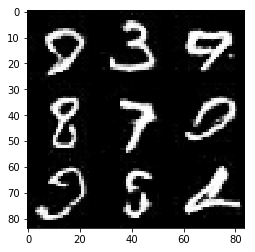

Epoch 2/2 Discriminator Loss: 0.8195 Generator Loss: 1.7647
Epoch 2/2 Discriminator Loss: 1.2089 Generator Loss: 0.7481
Epoch 2/2 Discriminator Loss: 1.6874 Generator Loss: 0.4398
Epoch 2/2 Discriminator Loss: 0.7736 Generator Loss: 1.3658
Epoch 2/2 Discriminator Loss: 0.7493 Generator Loss: 1.4951
Epoch 2/2 Discriminator Loss: 0.8850 Generator Loss: 1.1679
Epoch 2/2 Discriminator Loss: 0.7515 Generator Loss: 1.4539
Epoch 2/2 Discriminator Loss: 0.6424 Generator Loss: 1.7796
Epoch 2/2 Discriminator Loss: 2.0289 Generator Loss: 0.2898
Epoch 2/2 Discriminator Loss: 0.8478 Generator Loss: 1.2776


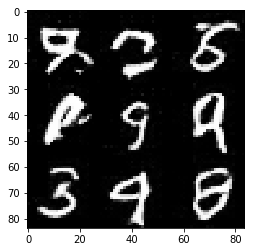

Epoch 2/2 Discriminator Loss: 0.9066 Generator Loss: 2.7468
Epoch 2/2 Discriminator Loss: 1.1538 Generator Loss: 2.5672
Epoch 2/2 Discriminator Loss: 0.7058 Generator Loss: 1.7149
Epoch 2/2 Discriminator Loss: 0.7853 Generator Loss: 1.3045
Epoch 2/2 Discriminator Loss: 0.6331 Generator Loss: 1.7966
Epoch 2/2 Discriminator Loss: 1.0378 Generator Loss: 0.9444
Epoch 2/2 Discriminator Loss: 0.8660 Generator Loss: 1.1896
Epoch 2/2 Discriminator Loss: 1.2650 Generator Loss: 0.6936
Epoch 2/2 Discriminator Loss: 1.8725 Generator Loss: 0.3139
Epoch 2/2 Discriminator Loss: 1.2605 Generator Loss: 0.7152


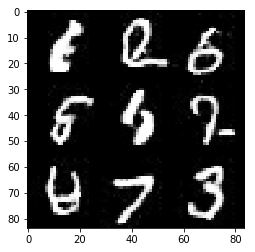

Epoch 2/2 Discriminator Loss: 0.7178 Generator Loss: 1.9469
Epoch 2/2 Discriminator Loss: 1.0342 Generator Loss: 0.9321
Epoch 2/2 Discriminator Loss: 0.9927 Generator Loss: 0.9026
Epoch 2/2 Discriminator Loss: 0.9134 Generator Loss: 1.2741
Epoch 2/2 Discriminator Loss: 0.8062 Generator Loss: 1.3929
Epoch 2/2 Discriminator Loss: 0.7185 Generator Loss: 2.0561
Epoch 2/2 Discriminator Loss: 0.8087 Generator Loss: 1.3788
Epoch 2/2 Discriminator Loss: 1.0022 Generator Loss: 1.2750
Epoch 2/2 Discriminator Loss: 1.1765 Generator Loss: 0.7439
Epoch 2/2 Discriminator Loss: 0.7178 Generator Loss: 1.8428


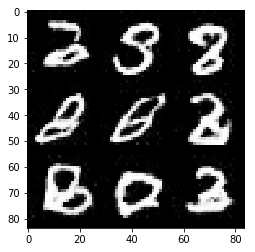

Epoch 2/2 Discriminator Loss: 0.8621 Generator Loss: 1.1468
Epoch 2/2 Discriminator Loss: 1.2720 Generator Loss: 0.6556
Epoch 2/2 Discriminator Loss: 1.0451 Generator Loss: 2.2298
Epoch 2/2 Discriminator Loss: 0.9390 Generator Loss: 2.4248
Epoch 2/2 Discriminator Loss: 0.8473 Generator Loss: 1.2340
Epoch 2/2 Discriminator Loss: 1.0468 Generator Loss: 2.1631
Epoch 2/2 Discriminator Loss: 0.8281 Generator Loss: 1.3308
Epoch 2/2 Discriminator Loss: 0.7553 Generator Loss: 1.4878
Epoch 2/2 Discriminator Loss: 0.7137 Generator Loss: 1.9212
Epoch 2/2 Discriminator Loss: 0.7006 Generator Loss: 2.1418


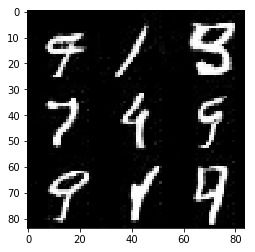

Epoch 2/2 Discriminator Loss: 1.1875 Generator Loss: 0.7679
Epoch 2/2 Discriminator Loss: 0.9789 Generator Loss: 1.0914
Epoch 2/2 Discriminator Loss: 1.8242 Generator Loss: 0.3889
Epoch 2/2 Discriminator Loss: 1.4642 Generator Loss: 0.5133
Epoch 2/2 Discriminator Loss: 0.7627 Generator Loss: 2.4655
Epoch 2/2 Discriminator Loss: 0.8165 Generator Loss: 2.0935
Epoch 2/2 Discriminator Loss: 0.7639 Generator Loss: 1.6445
Epoch 2/2 Discriminator Loss: 0.7056 Generator Loss: 1.8573
Epoch 2/2 Discriminator Loss: 0.8908 Generator Loss: 1.1488
Epoch 2/2 Discriminator Loss: 1.1141 Generator Loss: 0.8872


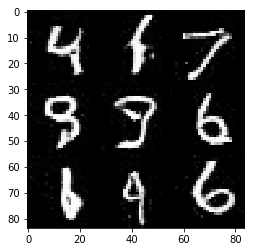

Epoch 2/2 Discriminator Loss: 2.0564 Generator Loss: 0.3631
Epoch 2/2 Discriminator Loss: 0.6992 Generator Loss: 1.5201
Epoch 2/2 Discriminator Loss: 1.7634 Generator Loss: 0.3642
Epoch 2/2 Discriminator Loss: 0.8097 Generator Loss: 1.3385
Epoch 2/2 Discriminator Loss: 0.7242 Generator Loss: 1.9462
Epoch 2/2 Discriminator Loss: 1.2522 Generator Loss: 0.7384
Epoch 2/2 Discriminator Loss: 1.3375 Generator Loss: 0.6138
Epoch 2/2 Discriminator Loss: 1.5831 Generator Loss: 0.4723
Epoch 2/2 Discriminator Loss: 1.6328 Generator Loss: 0.4465
Epoch 2/2 Discriminator Loss: 0.7029 Generator Loss: 2.0204


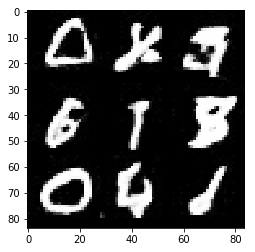

Epoch 2/2 Discriminator Loss: 0.5786 Generator Loss: 2.0952
Epoch 2/2 Discriminator Loss: 0.7485 Generator Loss: 1.6445
Epoch 2/2 Discriminator Loss: 0.9077 Generator Loss: 1.0909
Epoch 2/2 Discriminator Loss: 0.8291 Generator Loss: 1.3077
Epoch 2/2 Discriminator Loss: 1.9982 Generator Loss: 0.4111
Epoch 2/2 Discriminator Loss: 0.7897 Generator Loss: 2.2370
Epoch 2/2 Discriminator Loss: 0.8344 Generator Loss: 1.2775
Epoch 2/2 Discriminator Loss: 0.9057 Generator Loss: 1.0359
Epoch 2/2 Discriminator Loss: 0.8964 Generator Loss: 1.1479
Epoch 2/2 Discriminator Loss: 1.6080 Generator Loss: 0.4062


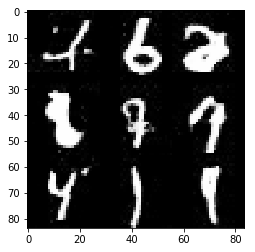

Epoch 2/2 Discriminator Loss: 0.8367 Generator Loss: 1.3702
Epoch 2/2 Discriminator Loss: 1.2175 Generator Loss: 0.6835
Epoch 2/2 Discriminator Loss: 1.4091 Generator Loss: 0.5746
Epoch 2/2 Discriminator Loss: 0.7850 Generator Loss: 2.9810
Epoch 2/2 Discriminator Loss: 0.8495 Generator Loss: 1.2564
Epoch 2/2 Discriminator Loss: 0.9597 Generator Loss: 1.1337
Epoch 2/2 Discriminator Loss: 1.7525 Generator Loss: 0.4877
Epoch 2/2 Discriminator Loss: 0.9873 Generator Loss: 1.0204
Epoch 2/2 Discriminator Loss: 0.8960 Generator Loss: 2.1556
Epoch 2/2 Discriminator Loss: 1.1913 Generator Loss: 0.7431


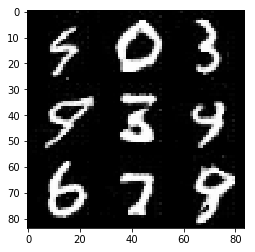

Epoch 2/2 Discriminator Loss: 0.6698 Generator Loss: 1.8523
Epoch 2/2 Discriminator Loss: 0.8117 Generator Loss: 1.3875
Epoch 2/2 Discriminator Loss: 0.8440 Generator Loss: 1.3025
Epoch 2/2 Discriminator Loss: 0.8642 Generator Loss: 1.1846
Epoch 2/2 Discriminator Loss: 1.4544 Generator Loss: 2.6851
Epoch 2/2 Discriminator Loss: 0.6687 Generator Loss: 1.5094
Epoch 2/2 Discriminator Loss: 0.8417 Generator Loss: 1.2842
Epoch 2/2 Discriminator Loss: 0.8364 Generator Loss: 1.1846
Epoch 2/2 Discriminator Loss: 0.9654 Generator Loss: 0.9717
Epoch 2/2 Discriminator Loss: 0.8100 Generator Loss: 1.3905


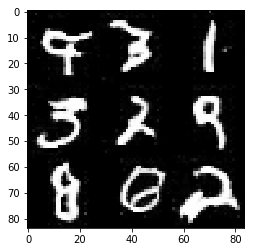

Epoch 2/2 Discriminator Loss: 0.8530 Generator Loss: 1.2059
Epoch 2/2 Discriminator Loss: 0.6468 Generator Loss: 1.7673
Epoch 2/2 Discriminator Loss: 1.9149 Generator Loss: 0.3984
Epoch 2/2 Discriminator Loss: 1.3318 Generator Loss: 0.5880
Epoch 2/2 Discriminator Loss: 0.7577 Generator Loss: 1.7947
Epoch 2/2 Discriminator Loss: 0.8936 Generator Loss: 1.1428
Epoch 2/2 Discriminator Loss: 0.7924 Generator Loss: 1.3311
Epoch 2/2 Discriminator Loss: 1.4904 Generator Loss: 0.6767
Epoch 2/2 Discriminator Loss: 0.9238 Generator Loss: 1.1222
Epoch 2/2 Discriminator Loss: 0.6219 Generator Loss: 1.9043


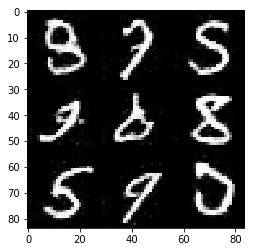

Epoch 2/2 Discriminator Loss: 0.7795 Generator Loss: 1.4099
Epoch 2/2 Discriminator Loss: 0.8532 Generator Loss: 1.2582
Epoch 2/2 Discriminator Loss: 0.7908 Generator Loss: 2.5575
Epoch 2/2 Discriminator Loss: 1.3238 Generator Loss: 0.7993
Epoch 2/2 Discriminator Loss: 0.6624 Generator Loss: 1.7991
Epoch 2/2 Discriminator Loss: 0.7428 Generator Loss: 2.4368
Epoch 2/2 Discriminator Loss: 1.8051 Generator Loss: 0.3375
Epoch 2/2 Discriminator Loss: 1.5560 Generator Loss: 0.4581
Epoch 2/2 Discriminator Loss: 0.9098 Generator Loss: 1.5018
Epoch 2/2 Discriminator Loss: 0.7304 Generator Loss: 1.8643


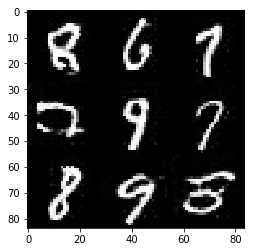

Epoch 2/2 Discriminator Loss: 1.2202 Generator Loss: 0.6597
Epoch 2/2 Discriminator Loss: 0.9004 Generator Loss: 1.3128
Epoch 2/2 Discriminator Loss: 1.1884 Generator Loss: 0.8715
Epoch 2/2 Discriminator Loss: 0.6772 Generator Loss: 1.8057
Epoch 2/2 Discriminator Loss: 1.5030 Generator Loss: 0.6088
Epoch 2/2 Discriminator Loss: 0.9241 Generator Loss: 1.1362
Epoch 2/2 Discriminator Loss: 1.3159 Generator Loss: 0.6540
Epoch 2/2 Discriminator Loss: 1.9804 Generator Loss: 0.3781
Epoch 2/2 Discriminator Loss: 1.2097 Generator Loss: 0.7960
Epoch 2/2 Discriminator Loss: 0.8787 Generator Loss: 1.4293


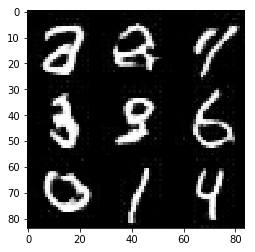

Epoch 2/2 Discriminator Loss: 0.9131 Generator Loss: 1.1523
Epoch 2/2 Discriminator Loss: 1.1056 Generator Loss: 0.8533
Epoch 2/2 Discriminator Loss: 0.7659 Generator Loss: 1.3155
Epoch 2/2 Discriminator Loss: 0.9846 Generator Loss: 1.1370
Epoch 2/2 Discriminator Loss: 1.0037 Generator Loss: 0.8984
Epoch 2/2 Discriminator Loss: 1.6127 Generator Loss: 0.5268
Epoch 2/2 Discriminator Loss: 1.3469 Generator Loss: 0.6343
Epoch 2/2 Discriminator Loss: 1.6949 Generator Loss: 0.4075
Epoch 2/2 Discriminator Loss: 0.6711 Generator Loss: 1.7267
Epoch 2/2 Discriminator Loss: 0.7392 Generator Loss: 2.2821


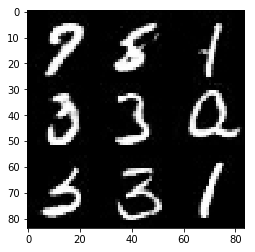

Epoch 2/2 Discriminator Loss: 1.7129 Generator Loss: 0.5202
Epoch 2/2 Discriminator Loss: 0.7443 Generator Loss: 1.6005
Epoch 2/2 Discriminator Loss: 0.8457 Generator Loss: 1.3426
Epoch 2/2 Discriminator Loss: 1.1597 Generator Loss: 0.9060
Epoch 2/2 Discriminator Loss: 0.6869 Generator Loss: 1.6001
Epoch 2/2 Discriminator Loss: 1.7547 Generator Loss: 0.4530
Epoch 2/2 Discriminator Loss: 0.7281 Generator Loss: 1.7005
Epoch 2/2 Discriminator Loss: 0.8309 Generator Loss: 2.1343
Epoch 2/2 Discriminator Loss: 0.7811 Generator Loss: 1.3151
Epoch 2/2 Discriminator Loss: 0.6870 Generator Loss: 1.9285


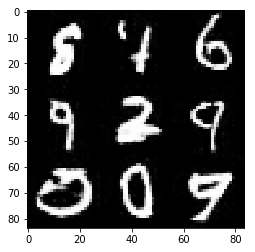

Epoch 2/2 Discriminator Loss: 1.1686 Generator Loss: 0.9471
Epoch 2/2 Discriminator Loss: 0.7273 Generator Loss: 1.6569
Epoch 2/2 Discriminator Loss: 1.9055 Generator Loss: 0.3693
Epoch 2/2 Discriminator Loss: 1.2074 Generator Loss: 0.8455
Epoch 2/2 Discriminator Loss: 0.8788 Generator Loss: 1.6012
Epoch 2/2 Discriminator Loss: 0.7426 Generator Loss: 1.5461
Epoch 2/2 Discriminator Loss: 0.5870 Generator Loss: 1.8332
Epoch 2/2 Discriminator Loss: 0.8530 Generator Loss: 1.1748
Epoch 2/2 Discriminator Loss: 0.9267 Generator Loss: 1.3774
Epoch 2/2 Discriminator Loss: 1.2537 Generator Loss: 0.6968


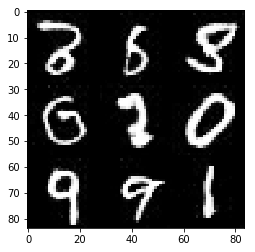

Epoch 2/2 Discriminator Loss: 1.1925 Generator Loss: 0.8253
Epoch 2/2 Discriminator Loss: 0.8700 Generator Loss: 1.0684
Epoch 2/2 Discriminator Loss: 0.6520 Generator Loss: 1.7082
Epoch 2/2 Discriminator Loss: 0.6331 Generator Loss: 1.8890
Epoch 2/2 Discriminator Loss: 0.7766 Generator Loss: 1.4252
Epoch 2/2 Discriminator Loss: 2.1885 Generator Loss: 0.2884
Epoch 2/2 Discriminator Loss: 1.9379 Generator Loss: 0.4609
Epoch 2/2 Discriminator Loss: 1.0299 Generator Loss: 0.8869
Epoch 2/2 Discriminator Loss: 0.7863 Generator Loss: 2.4036
Epoch 2/2 Discriminator Loss: 0.7664 Generator Loss: 1.5322


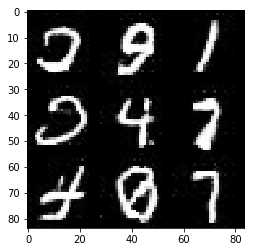

Epoch 2/2 Discriminator Loss: 2.0767 Generator Loss: 0.3375
Epoch 2/2 Discriminator Loss: 0.8864 Generator Loss: 1.3312
Epoch 2/2 Discriminator Loss: 0.7886 Generator Loss: 1.3777
Epoch 2/2 Discriminator Loss: 0.9271 Generator Loss: 1.0420
Epoch 2/2 Discriminator Loss: 1.3418 Generator Loss: 0.6405
Epoch 2/2 Discriminator Loss: 1.1935 Generator Loss: 0.7945
Epoch 2/2 Discriminator Loss: 1.0059 Generator Loss: 0.9820
Epoch 2/2 Discriminator Loss: 0.7963 Generator Loss: 1.2785
Epoch 2/2 Discriminator Loss: 0.9211 Generator Loss: 1.1275
Epoch 2/2 Discriminator Loss: 1.2455 Generator Loss: 0.6950


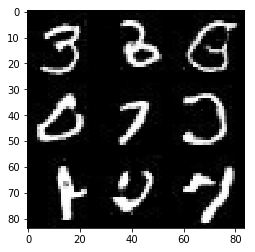

Epoch 2/2 Discriminator Loss: 1.2277 Generator Loss: 0.7597
Epoch 2/2 Discriminator Loss: 0.8082 Generator Loss: 1.2920
Epoch 2/2 Discriminator Loss: 1.4042 Generator Loss: 0.6186
Epoch 2/2 Discriminator Loss: 1.5881 Generator Loss: 0.5409
Epoch 2/2 Discriminator Loss: 1.2433 Generator Loss: 0.7867


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

1 64 100 0.002 0.5 <bound method Dataset.get_batches of <helper.Dataset object at 0x7fb2a6e21048>> (202599, 28, 28, 3) RGB
Epoch 1/1 Discriminator Loss: 0.4613 Generator Loss: 5.8346
Epoch 1/1 Discriminator Loss: 0.6084 Generator Loss: 4.4148
Epoch 1/1 Discriminator Loss: 0.5095 Generator Loss: 4.1917
Epoch 1/1 Discriminator Loss: 0.4360 Generator Loss: 3.1915
Epoch 1/1 Discriminator Loss: 5.1936 Generator Loss: 15.9021
Epoch 1/1 Discriminator Loss: 0.6271 Generator Loss: 1.8827
Epoch 1/1 Discriminator Loss: 0.5577 Generator Loss: 2.7568
Epoch 1/1 Discriminator Loss: 0.6373 Generator Loss: 2.0054
Epoch 1/1 Discriminator Loss: 2.8598 Generator Loss: 0.1139
Epoch 1/1 Discriminator Loss: 1.6522 Generator Loss: 0.4461


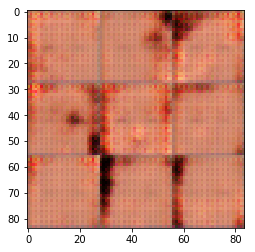

Epoch 1/1 Discriminator Loss: 1.5199 Generator Loss: 1.6314
Epoch 1/1 Discriminator Loss: 1.9342 Generator Loss: 0.2750
Epoch 1/1 Discriminator Loss: 1.4047 Generator Loss: 1.0654
Epoch 1/1 Discriminator Loss: 1.4839 Generator Loss: 1.5215
Epoch 1/1 Discriminator Loss: 1.6591 Generator Loss: 0.4215
Epoch 1/1 Discriminator Loss: 1.8304 Generator Loss: 0.4257
Epoch 1/1 Discriminator Loss: 1.4947 Generator Loss: 0.8195
Epoch 1/1 Discriminator Loss: 1.9024 Generator Loss: 1.2805
Epoch 1/1 Discriminator Loss: 1.7406 Generator Loss: 0.3689
Epoch 1/1 Discriminator Loss: 1.5207 Generator Loss: 0.6304


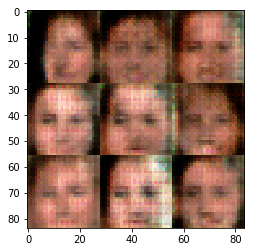

Epoch 1/1 Discriminator Loss: 1.7724 Generator Loss: 0.3618
Epoch 1/1 Discriminator Loss: 1.4690 Generator Loss: 1.5085
Epoch 1/1 Discriminator Loss: 1.6396 Generator Loss: 1.0145
Epoch 1/1 Discriminator Loss: 1.3773 Generator Loss: 0.7476
Epoch 1/1 Discriminator Loss: 1.3612 Generator Loss: 1.0887
Epoch 1/1 Discriminator Loss: 1.3946 Generator Loss: 0.5678
Epoch 1/1 Discriminator Loss: 1.9435 Generator Loss: 0.2591
Epoch 1/1 Discriminator Loss: 1.3806 Generator Loss: 0.6827
Epoch 1/1 Discriminator Loss: 1.5302 Generator Loss: 0.4849
Epoch 1/1 Discriminator Loss: 1.4816 Generator Loss: 0.4965


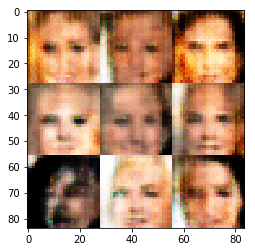

Epoch 1/1 Discriminator Loss: 1.6667 Generator Loss: 0.3626
Epoch 1/1 Discriminator Loss: 1.2605 Generator Loss: 1.2107
Epoch 1/1 Discriminator Loss: 1.2463 Generator Loss: 0.6268
Epoch 1/1 Discriminator Loss: 1.5082 Generator Loss: 0.4600
Epoch 1/1 Discriminator Loss: 1.8392 Generator Loss: 1.8328
Epoch 1/1 Discriminator Loss: 1.3342 Generator Loss: 0.7072
Epoch 1/1 Discriminator Loss: 1.3303 Generator Loss: 0.6207
Epoch 1/1 Discriminator Loss: 1.4484 Generator Loss: 0.9611
Epoch 1/1 Discriminator Loss: 1.5007 Generator Loss: 1.4266
Epoch 1/1 Discriminator Loss: 1.5834 Generator Loss: 1.4118


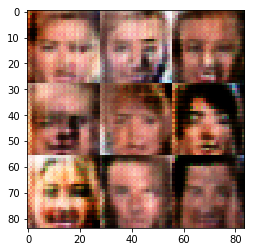

Epoch 1/1 Discriminator Loss: 1.3318 Generator Loss: 0.6880
Epoch 1/1 Discriminator Loss: 1.4107 Generator Loss: 1.3999
Epoch 1/1 Discriminator Loss: 1.4717 Generator Loss: 0.4546
Epoch 1/1 Discriminator Loss: 1.4530 Generator Loss: 0.5397
Epoch 1/1 Discriminator Loss: 1.6054 Generator Loss: 0.3739
Epoch 1/1 Discriminator Loss: 1.6557 Generator Loss: 0.4149
Epoch 1/1 Discriminator Loss: 1.4504 Generator Loss: 0.7656
Epoch 1/1 Discriminator Loss: 1.3756 Generator Loss: 0.6376
Epoch 1/1 Discriminator Loss: 1.1746 Generator Loss: 1.3579
Epoch 1/1 Discriminator Loss: 1.7503 Generator Loss: 1.9805


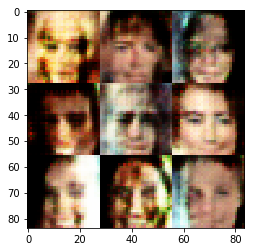

Epoch 1/1 Discriminator Loss: 1.4376 Generator Loss: 0.6653
Epoch 1/1 Discriminator Loss: 1.5273 Generator Loss: 0.5507
Epoch 1/1 Discriminator Loss: 1.3481 Generator Loss: 0.6478
Epoch 1/1 Discriminator Loss: 1.1076 Generator Loss: 1.5090
Epoch 1/1 Discriminator Loss: 1.3797 Generator Loss: 1.1044
Epoch 1/1 Discriminator Loss: 1.2840 Generator Loss: 0.6637
Epoch 1/1 Discriminator Loss: 1.4948 Generator Loss: 0.5360
Epoch 1/1 Discriminator Loss: 1.4084 Generator Loss: 1.0880
Epoch 1/1 Discriminator Loss: 1.3910 Generator Loss: 0.7904
Epoch 1/1 Discriminator Loss: 1.5418 Generator Loss: 0.5427


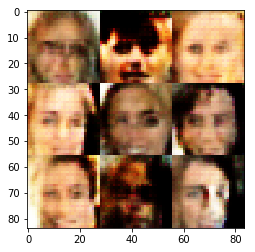

Epoch 1/1 Discriminator Loss: 1.3009 Generator Loss: 0.8690
Epoch 1/1 Discriminator Loss: 1.5534 Generator Loss: 0.4505
Epoch 1/1 Discriminator Loss: 1.3292 Generator Loss: 0.6958
Epoch 1/1 Discriminator Loss: 1.4938 Generator Loss: 0.6100
Epoch 1/1 Discriminator Loss: 1.5105 Generator Loss: 0.6152
Epoch 1/1 Discriminator Loss: 1.3998 Generator Loss: 0.4968
Epoch 1/1 Discriminator Loss: 1.5784 Generator Loss: 0.5388
Epoch 1/1 Discriminator Loss: 1.4078 Generator Loss: 0.6519
Epoch 1/1 Discriminator Loss: 1.4977 Generator Loss: 0.5374
Epoch 1/1 Discriminator Loss: 1.3661 Generator Loss: 0.7009


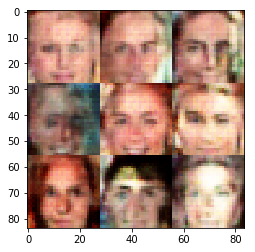

Epoch 1/1 Discriminator Loss: 1.3610 Generator Loss: 0.5776
Epoch 1/1 Discriminator Loss: 1.5265 Generator Loss: 0.7487
Epoch 1/1 Discriminator Loss: 1.3980 Generator Loss: 0.6413
Epoch 1/1 Discriminator Loss: 1.3583 Generator Loss: 0.7250
Epoch 1/1 Discriminator Loss: 1.3433 Generator Loss: 0.7392
Epoch 1/1 Discriminator Loss: 1.5087 Generator Loss: 1.2761
Epoch 1/1 Discriminator Loss: 1.3791 Generator Loss: 0.6437
Epoch 1/1 Discriminator Loss: 1.5021 Generator Loss: 0.4532
Epoch 1/1 Discriminator Loss: 1.1838 Generator Loss: 1.1805
Epoch 1/1 Discriminator Loss: 1.3867 Generator Loss: 0.5573


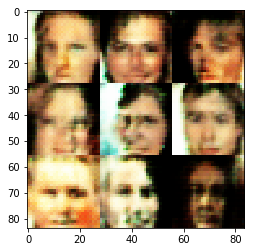

Epoch 1/1 Discriminator Loss: 1.4721 Generator Loss: 0.4703
Epoch 1/1 Discriminator Loss: 1.4238 Generator Loss: 0.5531
Epoch 1/1 Discriminator Loss: 1.4396 Generator Loss: 0.6648
Epoch 1/1 Discriminator Loss: 1.3809 Generator Loss: 1.2505
Epoch 1/1 Discriminator Loss: 1.3153 Generator Loss: 0.8105
Epoch 1/1 Discriminator Loss: 1.3352 Generator Loss: 0.5925
Epoch 1/1 Discriminator Loss: 1.5406 Generator Loss: 1.0228
Epoch 1/1 Discriminator Loss: 1.4225 Generator Loss: 0.6265
Epoch 1/1 Discriminator Loss: 1.4822 Generator Loss: 1.3345
Epoch 1/1 Discriminator Loss: 1.6230 Generator Loss: 0.6925


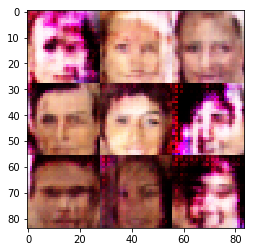

Epoch 1/1 Discriminator Loss: 1.5956 Generator Loss: 0.4818
Epoch 1/1 Discriminator Loss: 1.3481 Generator Loss: 0.7052
Epoch 1/1 Discriminator Loss: 1.2181 Generator Loss: 0.9727
Epoch 1/1 Discriminator Loss: 1.3877 Generator Loss: 0.5986
Epoch 1/1 Discriminator Loss: 1.4995 Generator Loss: 0.9521
Epoch 1/1 Discriminator Loss: 1.2585 Generator Loss: 0.7185
Epoch 1/1 Discriminator Loss: 1.3225 Generator Loss: 0.8467
Epoch 1/1 Discriminator Loss: 1.5218 Generator Loss: 0.8474
Epoch 1/1 Discriminator Loss: 1.4511 Generator Loss: 0.6013
Epoch 1/1 Discriminator Loss: 1.4155 Generator Loss: 0.6014


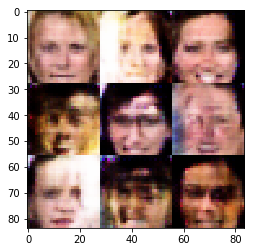

Epoch 1/1 Discriminator Loss: 1.4835 Generator Loss: 0.5051
Epoch 1/1 Discriminator Loss: 1.4291 Generator Loss: 0.7936
Epoch 1/1 Discriminator Loss: 1.3186 Generator Loss: 0.6512
Epoch 1/1 Discriminator Loss: 1.3802 Generator Loss: 0.8135
Epoch 1/1 Discriminator Loss: 1.4390 Generator Loss: 0.7515
Epoch 1/1 Discriminator Loss: 1.4785 Generator Loss: 0.5002
Epoch 1/1 Discriminator Loss: 1.3820 Generator Loss: 0.9195
Epoch 1/1 Discriminator Loss: 1.5488 Generator Loss: 0.9553
Epoch 1/1 Discriminator Loss: 1.5056 Generator Loss: 1.2257
Epoch 1/1 Discriminator Loss: 1.1994 Generator Loss: 0.9781


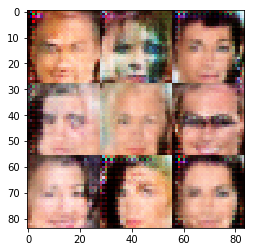

Epoch 1/1 Discriminator Loss: 1.4596 Generator Loss: 1.2013
Epoch 1/1 Discriminator Loss: 1.3256 Generator Loss: 0.7307
Epoch 1/1 Discriminator Loss: 1.4073 Generator Loss: 0.7244
Epoch 1/1 Discriminator Loss: 1.5568 Generator Loss: 0.4334
Epoch 1/1 Discriminator Loss: 1.7039 Generator Loss: 0.3776
Epoch 1/1 Discriminator Loss: 1.5109 Generator Loss: 0.4864
Epoch 1/1 Discriminator Loss: 1.5597 Generator Loss: 0.5792
Epoch 1/1 Discriminator Loss: 1.3069 Generator Loss: 0.8537
Epoch 1/1 Discriminator Loss: 1.4259 Generator Loss: 0.7664
Epoch 1/1 Discriminator Loss: 1.3850 Generator Loss: 0.6941


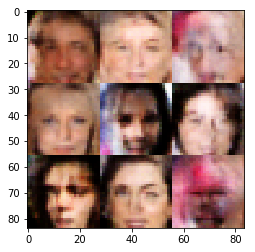

Epoch 1/1 Discriminator Loss: 1.4693 Generator Loss: 0.7318
Epoch 1/1 Discriminator Loss: 1.3611 Generator Loss: 0.6691
Epoch 1/1 Discriminator Loss: 1.3361 Generator Loss: 0.7668
Epoch 1/1 Discriminator Loss: 1.4572 Generator Loss: 0.6391
Epoch 1/1 Discriminator Loss: 1.4895 Generator Loss: 0.7080
Epoch 1/1 Discriminator Loss: 1.3445 Generator Loss: 0.6825
Epoch 1/1 Discriminator Loss: 1.4334 Generator Loss: 1.0057
Epoch 1/1 Discriminator Loss: 1.4716 Generator Loss: 0.5797
Epoch 1/1 Discriminator Loss: 1.3056 Generator Loss: 1.0414
Epoch 1/1 Discriminator Loss: 1.4614 Generator Loss: 1.0202


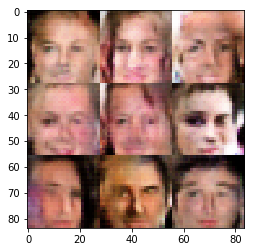

Epoch 1/1 Discriminator Loss: 1.4214 Generator Loss: 0.6794
Epoch 1/1 Discriminator Loss: 1.5627 Generator Loss: 0.5625
Epoch 1/1 Discriminator Loss: 1.4294 Generator Loss: 0.5990
Epoch 1/1 Discriminator Loss: 1.4294 Generator Loss: 0.8489
Epoch 1/1 Discriminator Loss: 1.3344 Generator Loss: 0.6825
Epoch 1/1 Discriminator Loss: 1.4075 Generator Loss: 0.7758
Epoch 1/1 Discriminator Loss: 1.4803 Generator Loss: 0.9442
Epoch 1/1 Discriminator Loss: 1.5288 Generator Loss: 0.6429
Epoch 1/1 Discriminator Loss: 1.3184 Generator Loss: 0.8420
Epoch 1/1 Discriminator Loss: 1.4592 Generator Loss: 0.5144


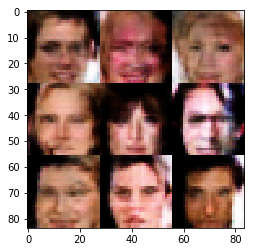

Epoch 1/1 Discriminator Loss: 1.4542 Generator Loss: 0.6473
Epoch 1/1 Discriminator Loss: 1.3905 Generator Loss: 0.9085
Epoch 1/1 Discriminator Loss: 1.3777 Generator Loss: 0.8669
Epoch 1/1 Discriminator Loss: 1.4565 Generator Loss: 0.7396
Epoch 1/1 Discriminator Loss: 1.5314 Generator Loss: 0.5242
Epoch 1/1 Discriminator Loss: 1.4168 Generator Loss: 0.6071
Epoch 1/1 Discriminator Loss: 1.3750 Generator Loss: 0.7109
Epoch 1/1 Discriminator Loss: 1.4674 Generator Loss: 0.6659
Epoch 1/1 Discriminator Loss: 1.4463 Generator Loss: 0.7368
Epoch 1/1 Discriminator Loss: 1.4708 Generator Loss: 0.8277


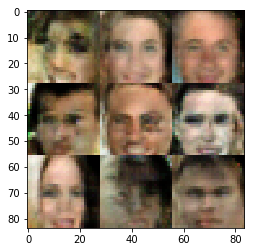

Epoch 1/1 Discriminator Loss: 1.5223 Generator Loss: 0.5725
Epoch 1/1 Discriminator Loss: 1.3603 Generator Loss: 0.8023
Epoch 1/1 Discriminator Loss: 1.3780 Generator Loss: 0.9130
Epoch 1/1 Discriminator Loss: 1.4491 Generator Loss: 0.5643
Epoch 1/1 Discriminator Loss: 1.3291 Generator Loss: 0.6228
Epoch 1/1 Discriminator Loss: 1.3977 Generator Loss: 0.7507
Epoch 1/1 Discriminator Loss: 1.4767 Generator Loss: 0.4682
Epoch 1/1 Discriminator Loss: 1.4346 Generator Loss: 0.9423
Epoch 1/1 Discriminator Loss: 1.3891 Generator Loss: 0.6410
Epoch 1/1 Discriminator Loss: 1.3864 Generator Loss: 0.7121


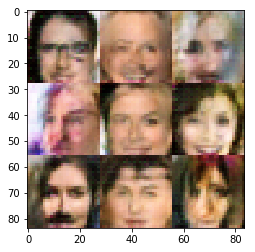

Epoch 1/1 Discriminator Loss: 1.4504 Generator Loss: 0.7554
Epoch 1/1 Discriminator Loss: 1.4187 Generator Loss: 0.7018
Epoch 1/1 Discriminator Loss: 1.3560 Generator Loss: 0.7890
Epoch 1/1 Discriminator Loss: 1.4361 Generator Loss: 0.7874
Epoch 1/1 Discriminator Loss: 1.5038 Generator Loss: 0.5391
Epoch 1/1 Discriminator Loss: 1.4534 Generator Loss: 0.5708
Epoch 1/1 Discriminator Loss: 1.4531 Generator Loss: 0.5068
Epoch 1/1 Discriminator Loss: 1.5252 Generator Loss: 0.8445
Epoch 1/1 Discriminator Loss: 1.4605 Generator Loss: 0.6296
Epoch 1/1 Discriminator Loss: 1.4731 Generator Loss: 0.6553


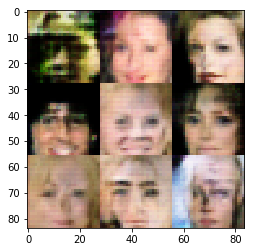

Epoch 1/1 Discriminator Loss: 1.4510 Generator Loss: 0.6568
Epoch 1/1 Discriminator Loss: 1.3600 Generator Loss: 0.7829
Epoch 1/1 Discriminator Loss: 1.4536 Generator Loss: 0.7048
Epoch 1/1 Discriminator Loss: 1.4220 Generator Loss: 0.7219
Epoch 1/1 Discriminator Loss: 1.4245 Generator Loss: 0.6650
Epoch 1/1 Discriminator Loss: 1.5864 Generator Loss: 0.4613
Epoch 1/1 Discriminator Loss: 1.4054 Generator Loss: 0.9260
Epoch 1/1 Discriminator Loss: 1.4453 Generator Loss: 0.7935
Epoch 1/1 Discriminator Loss: 1.4166 Generator Loss: 0.5874
Epoch 1/1 Discriminator Loss: 1.5151 Generator Loss: 0.4902


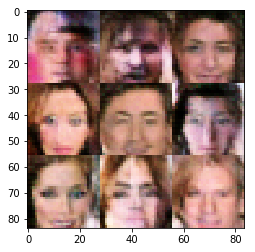

Epoch 1/1 Discriminator Loss: 1.3776 Generator Loss: 0.7703
Epoch 1/1 Discriminator Loss: 1.4769 Generator Loss: 0.9947
Epoch 1/1 Discriminator Loss: 1.5347 Generator Loss: 0.6862
Epoch 1/1 Discriminator Loss: 1.4275 Generator Loss: 0.9028
Epoch 1/1 Discriminator Loss: 1.4189 Generator Loss: 0.7114
Epoch 1/1 Discriminator Loss: 1.5506 Generator Loss: 0.5287
Epoch 1/1 Discriminator Loss: 1.2810 Generator Loss: 0.8305
Epoch 1/1 Discriminator Loss: 1.4744 Generator Loss: 1.0640
Epoch 1/1 Discriminator Loss: 1.4666 Generator Loss: 0.8693
Epoch 1/1 Discriminator Loss: 1.4164 Generator Loss: 0.7142


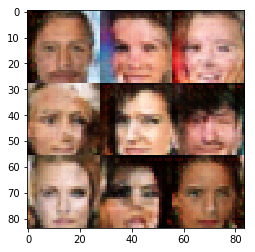

Epoch 1/1 Discriminator Loss: 1.4947 Generator Loss: 0.5846
Epoch 1/1 Discriminator Loss: 1.4404 Generator Loss: 0.6279
Epoch 1/1 Discriminator Loss: 1.3650 Generator Loss: 0.6543
Epoch 1/1 Discriminator Loss: 1.4593 Generator Loss: 0.5568
Epoch 1/1 Discriminator Loss: 1.4695 Generator Loss: 0.6846
Epoch 1/1 Discriminator Loss: 1.4093 Generator Loss: 0.6856
Epoch 1/1 Discriminator Loss: 1.4952 Generator Loss: 0.5105
Epoch 1/1 Discriminator Loss: 1.4186 Generator Loss: 0.7454
Epoch 1/1 Discriminator Loss: 1.4570 Generator Loss: 0.6880
Epoch 1/1 Discriminator Loss: 1.4443 Generator Loss: 0.7638


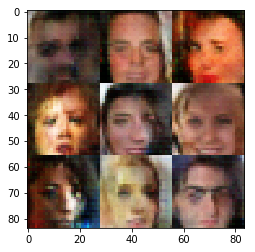

Epoch 1/1 Discriminator Loss: 1.5969 Generator Loss: 0.8490
Epoch 1/1 Discriminator Loss: 1.4023 Generator Loss: 0.6935
Epoch 1/1 Discriminator Loss: 1.4644 Generator Loss: 0.6566
Epoch 1/1 Discriminator Loss: 1.3352 Generator Loss: 0.7425
Epoch 1/1 Discriminator Loss: 1.5822 Generator Loss: 0.5007
Epoch 1/1 Discriminator Loss: 1.4544 Generator Loss: 0.6428
Epoch 1/1 Discriminator Loss: 1.3963 Generator Loss: 0.7048
Epoch 1/1 Discriminator Loss: 1.4360 Generator Loss: 0.5936
Epoch 1/1 Discriminator Loss: 1.4713 Generator Loss: 0.7366
Epoch 1/1 Discriminator Loss: 1.3793 Generator Loss: 0.8046


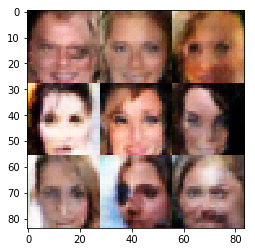

Epoch 1/1 Discriminator Loss: 1.4646 Generator Loss: 0.5583
Epoch 1/1 Discriminator Loss: 1.5176 Generator Loss: 0.5800
Epoch 1/1 Discriminator Loss: 1.5912 Generator Loss: 0.5418
Epoch 1/1 Discriminator Loss: 1.3991 Generator Loss: 0.6761
Epoch 1/1 Discriminator Loss: 1.4203 Generator Loss: 0.7593
Epoch 1/1 Discriminator Loss: 1.3944 Generator Loss: 0.8521
Epoch 1/1 Discriminator Loss: 1.5227 Generator Loss: 0.4405
Epoch 1/1 Discriminator Loss: 1.4498 Generator Loss: 0.6089
Epoch 1/1 Discriminator Loss: 1.5704 Generator Loss: 0.5202
Epoch 1/1 Discriminator Loss: 1.4392 Generator Loss: 0.7618


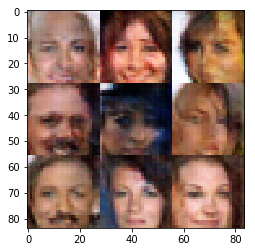

Epoch 1/1 Discriminator Loss: 1.4261 Generator Loss: 0.6522
Epoch 1/1 Discriminator Loss: 1.5132 Generator Loss: 0.6945
Epoch 1/1 Discriminator Loss: 1.5445 Generator Loss: 0.5861
Epoch 1/1 Discriminator Loss: 1.5167 Generator Loss: 0.5467
Epoch 1/1 Discriminator Loss: 1.5688 Generator Loss: 0.5875
Epoch 1/1 Discriminator Loss: 1.3656 Generator Loss: 0.7899
Epoch 1/1 Discriminator Loss: 1.5140 Generator Loss: 0.6353
Epoch 1/1 Discriminator Loss: 1.6944 Generator Loss: 0.3871
Epoch 1/1 Discriminator Loss: 1.6095 Generator Loss: 0.4343
Epoch 1/1 Discriminator Loss: 1.4127 Generator Loss: 0.7069


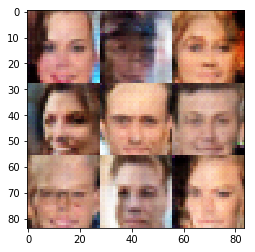

Epoch 1/1 Discriminator Loss: 1.4659 Generator Loss: 0.7180
Epoch 1/1 Discriminator Loss: 1.5980 Generator Loss: 0.4646
Epoch 1/1 Discriminator Loss: 1.4382 Generator Loss: 0.5809
Epoch 1/1 Discriminator Loss: 1.4494 Generator Loss: 0.7072
Epoch 1/1 Discriminator Loss: 1.4430 Generator Loss: 0.8622
Epoch 1/1 Discriminator Loss: 1.3960 Generator Loss: 0.6515
Epoch 1/1 Discriminator Loss: 1.3942 Generator Loss: 0.7389
Epoch 1/1 Discriminator Loss: 1.4660 Generator Loss: 0.6400
Epoch 1/1 Discriminator Loss: 1.3954 Generator Loss: 0.7407
Epoch 1/1 Discriminator Loss: 1.5355 Generator Loss: 0.6151


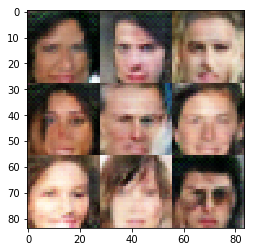

Epoch 1/1 Discriminator Loss: 1.5098 Generator Loss: 0.5075
Epoch 1/1 Discriminator Loss: 1.4429 Generator Loss: 0.5130
Epoch 1/1 Discriminator Loss: 1.5532 Generator Loss: 0.4527
Epoch 1/1 Discriminator Loss: 1.4298 Generator Loss: 0.5694
Epoch 1/1 Discriminator Loss: 1.5334 Generator Loss: 0.5833
Epoch 1/1 Discriminator Loss: 1.4515 Generator Loss: 0.5968
Epoch 1/1 Discriminator Loss: 1.4252 Generator Loss: 0.6265
Epoch 1/1 Discriminator Loss: 1.4854 Generator Loss: 0.7493
Epoch 1/1 Discriminator Loss: 1.3531 Generator Loss: 0.7161
Epoch 1/1 Discriminator Loss: 1.5315 Generator Loss: 0.6587


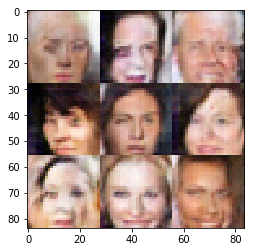

Epoch 1/1 Discriminator Loss: 1.4646 Generator Loss: 0.7000
Epoch 1/1 Discriminator Loss: 1.4830 Generator Loss: 0.5363
Epoch 1/1 Discriminator Loss: 1.4297 Generator Loss: 0.5834
Epoch 1/1 Discriminator Loss: 1.5528 Generator Loss: 0.5265
Epoch 1/1 Discriminator Loss: 1.4390 Generator Loss: 0.7543
Epoch 1/1 Discriminator Loss: 1.4999 Generator Loss: 0.6913
Epoch 1/1 Discriminator Loss: 1.4667 Generator Loss: 0.6054
Epoch 1/1 Discriminator Loss: 1.4922 Generator Loss: 0.6783
Epoch 1/1 Discriminator Loss: 1.4548 Generator Loss: 0.5831
Epoch 1/1 Discriminator Loss: 1.4155 Generator Loss: 0.5521


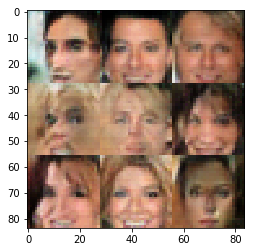

Epoch 1/1 Discriminator Loss: 1.4762 Generator Loss: 0.6975
Epoch 1/1 Discriminator Loss: 1.4111 Generator Loss: 0.6982
Epoch 1/1 Discriminator Loss: 1.3725 Generator Loss: 0.8077
Epoch 1/1 Discriminator Loss: 1.4709 Generator Loss: 0.7582
Epoch 1/1 Discriminator Loss: 1.3904 Generator Loss: 0.7466
Epoch 1/1 Discriminator Loss: 1.5386 Generator Loss: 0.6780
Epoch 1/1 Discriminator Loss: 1.6349 Generator Loss: 0.4248
Epoch 1/1 Discriminator Loss: 1.4503 Generator Loss: 0.7243
Epoch 1/1 Discriminator Loss: 1.4521 Generator Loss: 0.6121
Epoch 1/1 Discriminator Loss: 1.5324 Generator Loss: 0.5846


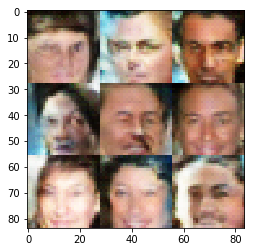

Epoch 1/1 Discriminator Loss: 1.5375 Generator Loss: 0.5446
Epoch 1/1 Discriminator Loss: 1.3655 Generator Loss: 0.7425
Epoch 1/1 Discriminator Loss: 1.5291 Generator Loss: 0.5584
Epoch 1/1 Discriminator Loss: 1.4374 Generator Loss: 0.7079
Epoch 1/1 Discriminator Loss: 1.5984 Generator Loss: 0.5071
Epoch 1/1 Discriminator Loss: 1.4950 Generator Loss: 0.7050
Epoch 1/1 Discriminator Loss: 1.4668 Generator Loss: 0.7119
Epoch 1/1 Discriminator Loss: 1.5856 Generator Loss: 0.5049
Epoch 1/1 Discriminator Loss: 1.4814 Generator Loss: 0.5835
Epoch 1/1 Discriminator Loss: 1.5352 Generator Loss: 0.5078


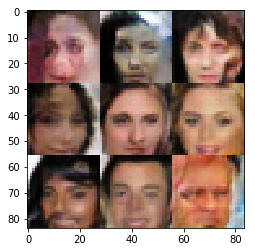

Epoch 1/1 Discriminator Loss: 1.4921 Generator Loss: 0.5900
Epoch 1/1 Discriminator Loss: 1.4595 Generator Loss: 0.6117
Epoch 1/1 Discriminator Loss: 1.5125 Generator Loss: 0.7447
Epoch 1/1 Discriminator Loss: 1.5739 Generator Loss: 0.5511
Epoch 1/1 Discriminator Loss: 1.4683 Generator Loss: 0.5752
Epoch 1/1 Discriminator Loss: 1.5015 Generator Loss: 0.5713
Epoch 1/1 Discriminator Loss: 1.3833 Generator Loss: 0.6359
Epoch 1/1 Discriminator Loss: 1.4019 Generator Loss: 0.6515
Epoch 1/1 Discriminator Loss: 1.5236 Generator Loss: 0.6214
Epoch 1/1 Discriminator Loss: 1.4672 Generator Loss: 0.6387


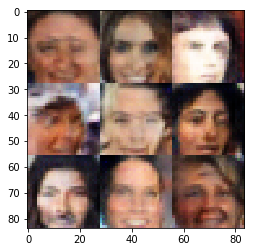

Epoch 1/1 Discriminator Loss: 1.4088 Generator Loss: 0.7255
Epoch 1/1 Discriminator Loss: 1.5324 Generator Loss: 0.6081
Epoch 1/1 Discriminator Loss: 1.4849 Generator Loss: 0.5460
Epoch 1/1 Discriminator Loss: 1.4726 Generator Loss: 0.6165
Epoch 1/1 Discriminator Loss: 1.4480 Generator Loss: 0.6224
Epoch 1/1 Discriminator Loss: 1.4721 Generator Loss: 0.6443
Epoch 1/1 Discriminator Loss: 1.5258 Generator Loss: 0.6222
Epoch 1/1 Discriminator Loss: 1.5320 Generator Loss: 0.6274
Epoch 1/1 Discriminator Loss: 1.5333 Generator Loss: 0.5406
Epoch 1/1 Discriminator Loss: 1.5651 Generator Loss: 0.5522


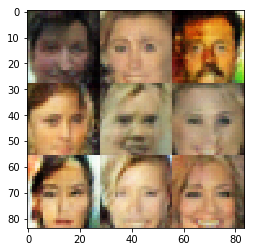

Epoch 1/1 Discriminator Loss: 1.3817 Generator Loss: 0.7673
Epoch 1/1 Discriminator Loss: 1.4682 Generator Loss: 0.7159
Epoch 1/1 Discriminator Loss: 1.5084 Generator Loss: 0.6115
Epoch 1/1 Discriminator Loss: 1.4511 Generator Loss: 0.7737
Epoch 1/1 Discriminator Loss: 1.5457 Generator Loss: 0.5301
Epoch 1/1 Discriminator Loss: 1.4607 Generator Loss: 0.6311
Epoch 1/1 Discriminator Loss: 1.4999 Generator Loss: 0.5957
Epoch 1/1 Discriminator Loss: 1.4182 Generator Loss: 0.6974
Epoch 1/1 Discriminator Loss: 1.4579 Generator Loss: 0.7844
Epoch 1/1 Discriminator Loss: 1.5149 Generator Loss: 0.6133


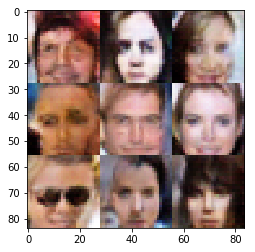

Epoch 1/1 Discriminator Loss: 1.4296 Generator Loss: 0.7255
Epoch 1/1 Discriminator Loss: 1.3844 Generator Loss: 0.8661
Epoch 1/1 Discriminator Loss: 1.4105 Generator Loss: 0.7958
Epoch 1/1 Discriminator Loss: 1.5080 Generator Loss: 0.7769
Epoch 1/1 Discriminator Loss: 1.4464 Generator Loss: 0.6551
Epoch 1/1 Discriminator Loss: 1.4876 Generator Loss: 0.5555


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.